In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
import ssl
from PIL import Image

Image size: (748, 1200)


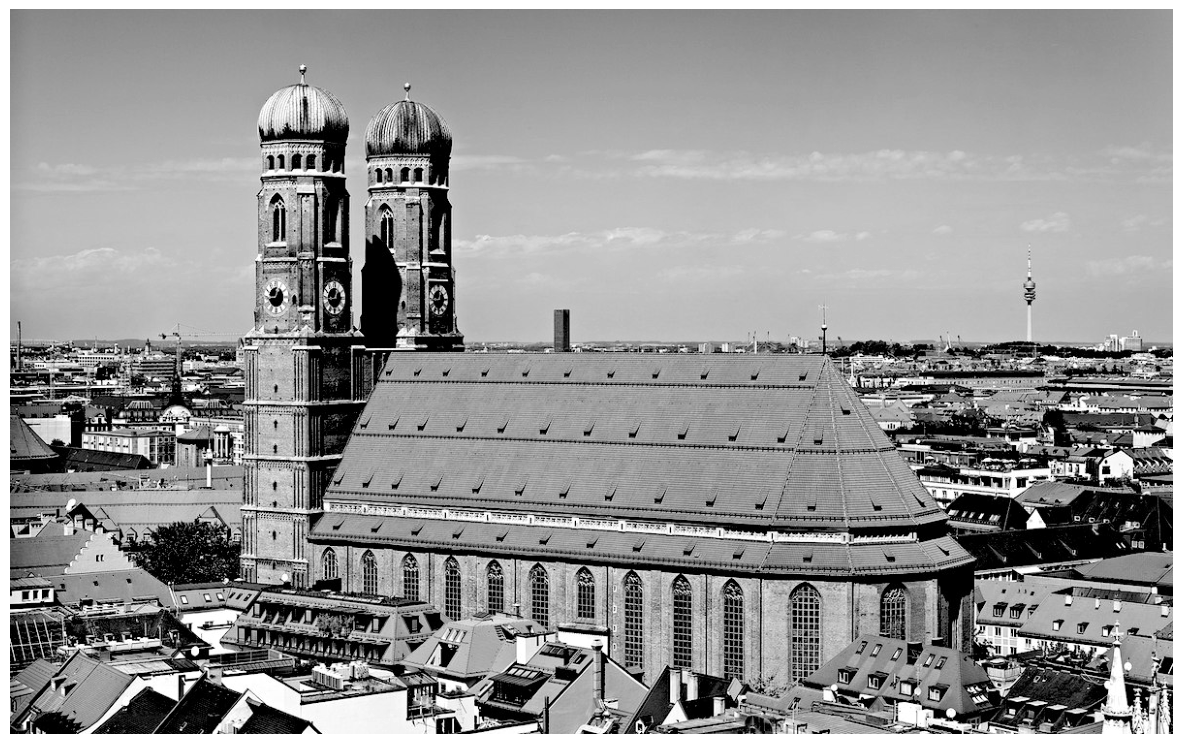

In [ ]:
#Choose Image
url = 'https://nextcloud.tfk.ph.tum.de/cmt/index.php/s/aDGgD3BLPGnnERK/preview'
#url = 'https://nextcloud.tfk.ph.tum.de/cmt/index.php/s/xEDK7o6HNWX6Med/preview'

with urlopen(url, context=ssl._create_unverified_context()) as file:
  img_full = np.asarray(Image.open(file))[:, :, 0]

print("Image size:",img_full.shape)
plt.figure(figsize=[15,10])
plt.imshow(img_full, cmap='gray')
plt.axis('off');

Number of singular values: 748
Truncation_error: 0.1458453066


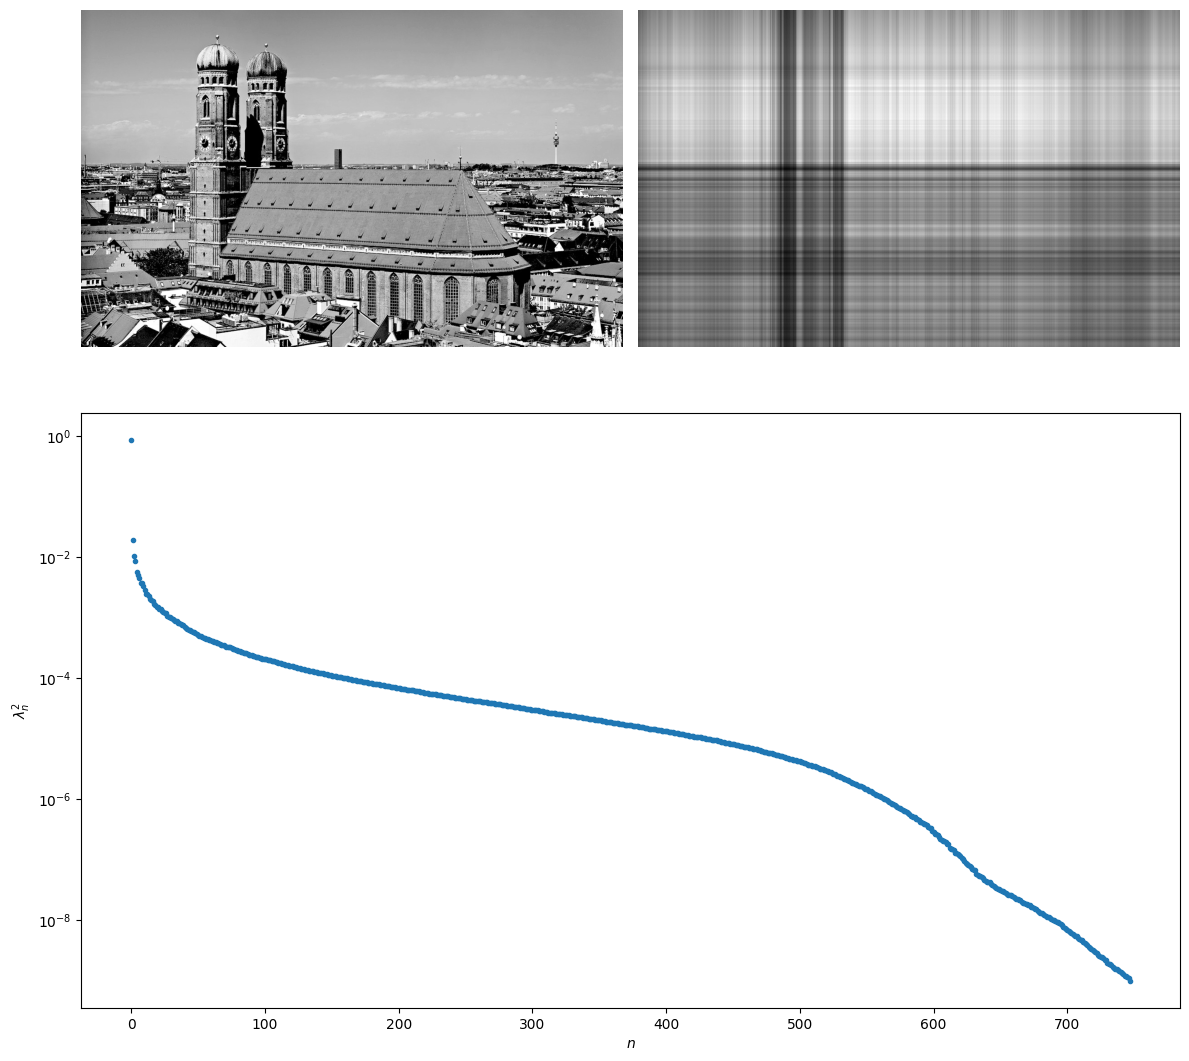

In [ ]:
chi = 1

U, s, V = np.linalg.svd(img_full)
img_cmprs = np.dot(U[:, :chi] * s[:chi], V[:chi, :])

print("Number of singular values: %.0f" % (s.shape))
print("Truncation_error: %.10f" % (np.sum(s[chi:]**2) / np.sum(s**2)))

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(img_full, cmap='gray')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(img_cmprs, cmap='gray')
plt.axis('off')
plt.subplot(2, 1, 2)
plt.semilogy(s**2/ np.sum(s**2),'.')
plt.ylabel("$\\lambda_n^2$")
plt.xlabel("$n$")
plt.tight_layout()